In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
% cd gdrive/MyDrive/project_sp/drnn

Mounted at /content/gdrive
/content/gdrive/MyDrive/project_sp/drnn


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
#tf.enable_v2_behavior()

import tensorflow_probability as tfp
tfd = tfp.distributions
import pandas as pd

#to make matplotlib output appear in notebook
%matplotlib inline

from models import model_normal
from utils import utils
from utils import plots
from utils import overhead

In [3]:
#loss function
negloglik = lambda y, p_y: -p_y.log_prob(y)
loss_fun = negloglik
# How large is the dataset?
N = 15000
# number of epochs to train the model for
max_num_epochs = 2000
# define batch size for training
batch_size = 256
# maximum number of hidden units for random search
max_hidden_units = 1800
# learning rate
lr = 0.0005
# number hidden layers
max_num_hidden_layers = 10
#number of predictors
k = 20
#number of sets for random search
num_sets = 150

#filetype
filename = "expnormal20d"
num_files = 10

#model type
modeltype = model_normal

#random seed
rdseed = 20125

#optimizer
optimer = tf.keras.optimizers.Adam
activation_fun = 'relu'

#schedule
schedule = True
earlystop = True
pat = 30

In [4]:
modeltype

<module 'models.model_normal' from '/content/gdrive/MyDrive/project_sp/drnn/models/model_normal.py'>

In [ ]:
hu_key = overhead.fitsimdat(num_sets = num_sets, max_num_hidden_layers = max_num_hidden_layers, 
            max_hidden_units = max_hidden_units, rdseed = rdseed,
            filename = filename, num_files = num_files, k = k, modeltype = modeltype, 
            activation_fun = activation_fun, loss_fun = loss_fun, optimer = optimer,
            lr = lr, batch_size = batch_size, max_num_epochs = max_num_epochs, 
            schedule = schedule, earlystop = earlystop, pat = pat,
            distr = "normal", save = True)

doing 1th dataset
<module 'models.model_normal' from '/content/gdrive/MyDrive/project_sp/drnn/models/model_normal.py'>
in fitsimdat:normal
in opt_hunormal
[ 982. 1458.]
[ 889. 1596. 1412.  948.  501.]
[254. 288. 349. 253. 206. 184.]
[ 594.  826. 1302. 1462. 1478. 1292.  888.  502.  336.]
[1096. 1147. 1745. 1333.  845.]
[1134. 1314. 1473.  967.  594.  573.]
[1319. 1684. 1576.]
[1679. 1555.]
[109. 182. 362. 202. 124. 117.]
[1256.  910.]
[ 629.  662.  934. 1052.  720.  560.]
[ 947. 1487. 1024.]
[102. 128.  96.  88.  66.  65.  50.  30.]
[324. 341. 648. 353. 332. 249. 193. 131.]
[ 404.  530. 1013. 1696. 1250.  816.]
[ 672.  794.  888. 1113.  651.  555.]
[1391.]
[ 24.  39.  78. 152. 157. 140.  97.  49.]
[521. 880. 883. 461.]
[ 220.  318.  376.  635. 1248.  944.  713.  506.  362.  283.]
[307.]
[149. 227. 166.  84.  49.  36.  26.  25.  17.  10.]
[394. 478. 516. 961. 582. 409. 337. 207. 175.]
[1128. 1753.]
[412. 458.]
[341. 428. 612. 884. 644. 565.]
[1329.]
[1414. 1589.  892.]
[ 964. 1024. 1047

In [8]:
hu_key = overhead.fitsimdat(num_sets = num_sets, max_num_hidden_layers = max_num_hidden_layers, 
            max_hidden_units = max_hidden_units, rdseed = rdseed,
            filename = filename, num_files = 2, k = k, modeltype = modeltype, 
            activation_fun = activation_fun, loss_fun = loss_fun, optimer = optimer,
            lr = lr, batch_size = batch_size, max_num_epochs = max_num_epochs, 
            schedule = schedule, earlystop = earlystop, pat = pat,
            distr = "normal", save = True, startkj = 8)

doing 9th dataset
<module 'models.model_normal' from '/content/gdrive/MyDrive/project_sp/drnn/models/model_normal.py'>
in fitsimdat:normal
in opt_hunormal
[ 982. 1458.]
[ 889. 1596. 1412.  948.  501.]
[254. 288. 349. 253. 206. 184.]
[ 594.  826. 1302. 1462. 1478. 1292.  888.  502.  336.]
[1096. 1147. 1745. 1333.  845.]
[1134. 1314. 1473.  967.  594.  573.]
[1319. 1684. 1576.]
[1679. 1555.]
[109. 182. 362. 202. 124. 117.]
[1256.  910.]
[ 629.  662.  934. 1052.  720.  560.]
[ 947. 1487. 1024.]
[102. 128.  96.  88.  66.  65.  50.  30.]
[324. 341. 648. 353. 332. 249. 193. 131.]
[ 404.  530. 1013. 1696. 1250.  816.]
[ 672.  794.  888. 1113.  651.  555.]
[1391.]
[ 24.  39.  78. 152. 157. 140.  97.  49.]
[521. 880. 883. 461.]
[ 220.  318.  376.  635. 1248.  944.  713.  506.  362.  283.]
[307.]
[149. 227. 166.  84.  49.  36.  26.  25.  17.  10.]
[394. 478. 516. 961. 582. 409. 337. 207. 175.]
[1128. 1753.]
[412. 458.]
[341. 428. 612. 884. 644. 565.]
[1329.]
[1414. 1589.  892.]
[ 964. 1024. 1047

look at resulting distribution

In [4]:
resdat = pd.read_csv("results/expnormal20d_6.csv")

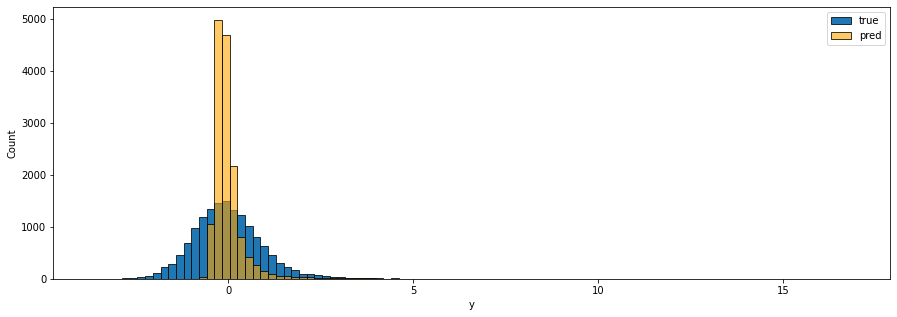

In [19]:
plots.hists(resdat['pred_mean'], resdat['y'])

doesn't look too hot. Let's fit a model from scratch.

In [6]:
x, x_test, x_all, y, y_test, dataset = utils.read_data("expnormal20d", 6, 20)

In [7]:
hu_list = utils.rdsearch(30, 30, max_num_hidden_layers, max_hidden_units)

In [8]:
hu_list

[array([796., 991., 635., 626., 564., 427.]),
 array([275., 313., 221., 159.]),
 array([ 393.,  662., 1092.,  829.]),
 array([624.]),
 array([238., 295., 364., 416., 723., 695., 451., 300.]),
 array([396., 471., 668., 747., 651., 493.]),
 array([681., 665., 437., 436., 372., 277., 157., 108., 103.,  80.]),
 array([1263., 1177., 1079.,  823.,  615.]),
 array([389., 746., 412., 239.]),
 array([273., 388., 523., 526., 370., 330., 223., 120., 105.,  59.]),
 array([1694., 1183.,  994.,  743.,  479.,  390.,  206.]),
 array([229., 199., 154., 129.]),
 array([219., 291., 387., 696., 378., 361., 263., 201.]),
 array([516., 452., 445., 391., 300.]),
 array([576., 370., 266., 250.]),
 array([468., 487., 337., 236., 204., 158., 117., 113.]),
 array([1361.]),
 array([584., 942., 769.]),
 array([231., 258., 378., 326.]),
 array([ 807., 1432.,  765.]),
 array([165., 104.,  94.,  47.]),
 array([195., 116.]),
 array([159., 311., 260., 237., 183., 180.]),
 array([312., 539., 501., 357., 343.]),
 array([

In [9]:
hu_list[24]

array([1082., 1377., 1219., 1212., 1086., 1080.,  671.,  627.])

first, without earlystop

In [9]:
mymod_wop = modeltype.DDR_MLP(len(hu_list[7]),
                          hu_list[7],
                          activation_fun = 'relu',
                          input_dim = 20)

In [11]:
mymod_wop, myhist_wop = utils.run_training(mymod_wop, x, y, negloglik, max_num_epochs,
                                           batch_size, lr = 0.001, optim = optimer, 
                                           schedule = True, earlystop = False)

doing schedule


In [13]:
yhat = np.array(mymod_wop(x).loc).flatten()
yhat_tst = np.array(mymod_wop(x_test).loc).flatten()

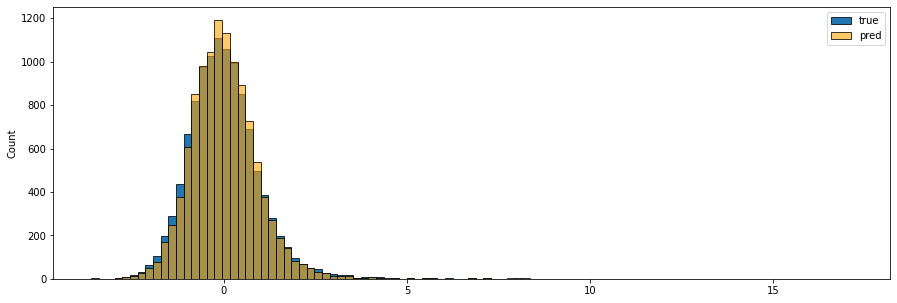

In [14]:
plots.hists(yhat, y)

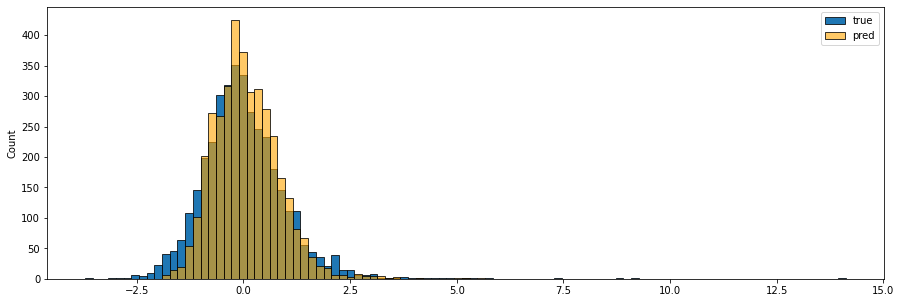

In [15]:
plots.hists(yhat_tst, y_test)

In [16]:
myhist_wop.history['val_loss']

[1.4175865650177002,
 1.3707448244094849,
 1.2727839946746826,
 1.279934048652649,
 1.2621337175369263,
 1.253977656364441,
 1.2501070499420166,
 1.260471224784851,
 1.250573992729187,
 1.2922520637512207,
 1.267189860343933,
 1.266960859298706,
 1.263979196548462,
 1.2609223127365112,
 1.2977428436279297,
 1.3617795705795288,
 1.3817652463912964,
 1.321925401687622,
 1.3659327030181885,
 1.415377140045166,
 1.4477078914642334,
 1.585387110710144,
 1.791759967803955,
 1.791915774345398,
 1.880196452140808,
 2.25577712059021,
 2.218628406524658,
 2.515141010284424,
 3.1156005859375,
 3.160344362258911,
 2.956592082977295,
 3.5067954063415527,
 3.9752562046051025,
 4.148554801940918,
 5.34263801574707,
 5.651834964752197,
 6.047229290008545,
 6.545309543609619,
 8.77253532409668,
 7.887200832366943,
 9.917710304260254,
 10.987771987915039,
 11.744610786437988,
 12.476433753967285,
 11.210394859313965,
 10.143426895141602,
 11.907273292541504,
 17.19950294494629,
 16.3806095123291,
 19.82

In [54]:
myhist_wop.history['loss']

[1.4743160009384155,
 1.329888939857483,
 1.2741791009902954,
 1.2462403774261475,
 1.2577569484710693,
 1.2375502586364746,
 1.227087378501892,
 1.2183321714401245,
 1.2116817235946655,
 1.2256299257278442,
 1.1980535984039307,
 1.1961044073104858,
 1.1811712980270386,
 1.1812703609466553,
 1.1498634815216064,
 1.1291038990020752,
 1.1323117017745972,
 1.108089566230774,
 1.0827445983886719,
 1.0368753671646118,
 1.0134687423706055,
 0.9685713052749634,
 0.9263808727264404,
 0.9030717015266418,
 0.8288314938545227,
 0.7760883569717407,
 0.712775707244873,
 0.6701388955116272,
 0.6163299083709717,
 0.5478223562240601,
 0.5700744390487671,
 0.4473566710948944,
 0.3752860724925995,
 0.3171292543411255,
 0.24689553678035736,
 0.18231946229934692,
 0.12097301334142685,
 0.06424983590841293,
 -0.009149115532636642,
 -0.07199060916900635,
 -0.11227309703826904,
 -0.1565791815519333,
 -0.1695646494626999,
 -0.22105740010738373,
 -0.260994553565979,
 -0.3226361572742462,
 -0.29725855588912964,

In [29]:
mymod_feweps = modeltype.DDR_MLP(len(hu_list[7]),
                          hu_list[7],
                          activation_fun = 'relu',
                          input_dim = 20)

In [30]:
mymod_feweps, myhist_feweps = utils.run_training(mymod_feweps, x, y, negloglik, num_epochs = 30,
                                           batch_size = 256, lr = 0.001, optim = optimer, 
                                           schedule = True, earlystop = False)

doing schedule


In [31]:
myhist_feweps.history['val_loss']

[1.3323780298233032,
 1.3649920225143433,
 1.2875633239746094,
 1.294539451599121,
 1.285587191581726,
 1.2703359127044678,
 1.2613770961761475,
 1.2552905082702637,
 1.2774200439453125,
 1.2615954875946045,
 1.2849311828613281,
 1.2762973308563232,
 1.3027102947235107,
 1.2862050533294678,
 1.3245042562484741,
 1.3641712665557861,
 1.3903002738952637,
 1.4156242609024048,
 1.4989268779754639,
 1.4972022771835327,
 1.700439691543579,
 1.909510850906372,
 1.853859305381775,
 2.189878463745117,
 2.3972079753875732,
 2.6638741493225098,
 2.6052603721618652,
 2.9563612937927246,
 3.9035768508911133,
 3.9049489498138428]

In [32]:
yhat = np.array(mymod_feweps(x).loc).flatten()
yhat_tst = np.array(mymod_feweps(x_test).loc).flatten()

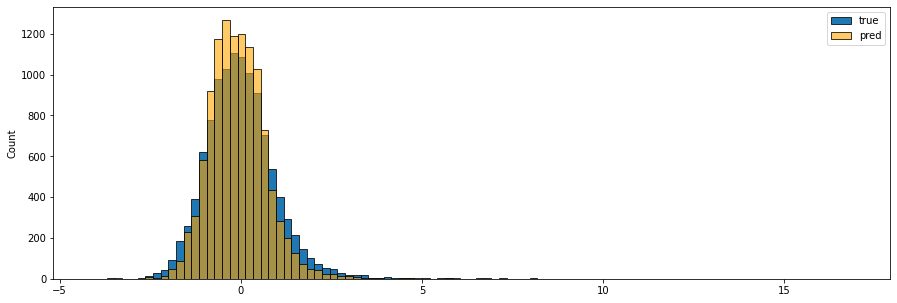

In [33]:
plots.hists(yhat, y)

check if patience is set somewhere??

In [33]:
mymod = modeltype.DDR_MLP(len(hu_list[7]),
                          hu_list[7],
                          activation_fun = 'relu',
                          input_dim = 20)
mymod, myhist = utils.run_training(mymod, x, y, negloglik, max_num_epochs, 
                                   batch_size, lr = 0.001, optim = optimer, schedule = True, earlystop = True, pat = 30)

In [34]:
yhat = np.array(mymod(x).loc).flatten()
yhat_tst = np.array(mymod(x_test).loc).flatten()

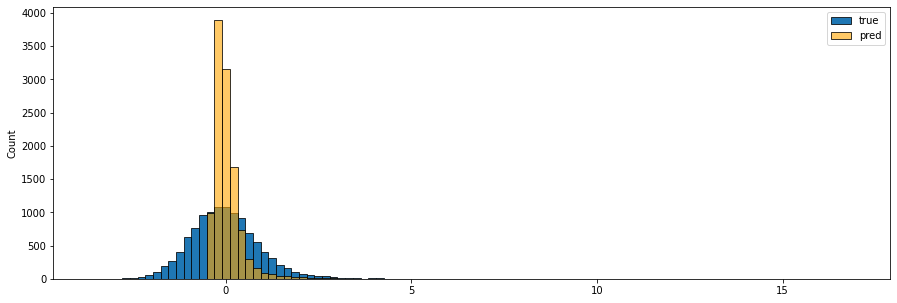

In [35]:
plots.hists(yhat, y)

In [51]:
mymod = modeltype.DDR_MLP(len(hu_list[7]),
                          hu_list[7],
                          activation_fun = 'relu',
                          input_dim = 20)
mymod, myhist = utils.run_training(mymod, x, y, negloglik, 100, 
                                   batch_size, lr = 0.0001, optim = optimer, schedule = True, earlystop = True, pat = 10)

In [52]:
myhist.history['val_loss']

[1.528936505317688,
 1.4039952754974365,
 1.3267375230789185,
 1.337807536125183,
 1.3118780851364136,
 1.3818360567092896,
 1.3320170640945435,
 1.2964361906051636,
 1.285988688468933,
 1.2981621026992798,
 1.289047360420227,
 1.295040249824524,
 1.2870466709136963,
 1.3185310363769531,
 1.2802059650421143,
 1.3193936347961426,
 1.295636534690857,
 1.3094773292541504,
 1.3435755968093872,
 1.3167445659637451,
 1.3579388856887817,
 1.3313114643096924,
 1.4046491384506226,
 1.440743327140808,
 1.469683051109314]

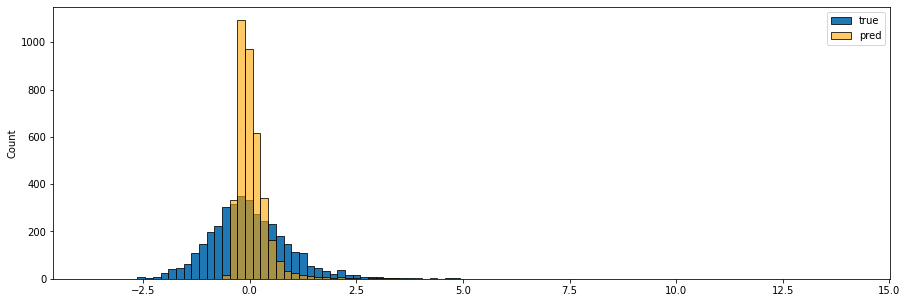

In [53]:
yhat = np.array(mymod(x).loc).flatten()
yhat_tst = np.array(mymod(x_test).loc).flatten()
plots.hists(yhat_tst, y_test)

In [10]:
mymod_wop = modeltype.DDR_MLP(len(hu_list[24]),
                          hu_list[24],
                          activation_fun = 'relu',
                          input_dim = 20)
mymod_wop, myhist_wop = utils.run_training(mymod_wop, x, y, negloglik, 4000,
                                           batch_size, lr = 0.001, optim = optimer, 
                                           schedule = True, earlystop = False)

doing schedule


In [11]:
yhat = np.array(mymod_wop(x).loc).flatten()
yhat_tst = np.array(mymod_wop(x_test).loc).flatten()

In [16]:
tf.math.reduce_mean(mymod_wop(x_test).log_prob(tf.cast(y_test, tf.float32)))

<tf.Tensor: shape=(), dtype=float32, numpy=-105098.33>

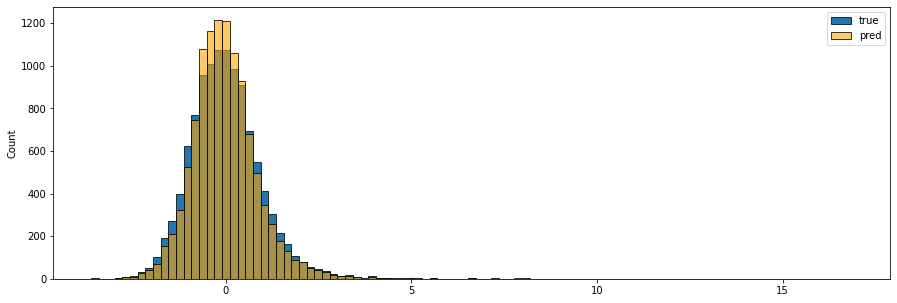

In [20]:
plots.hists(yhat, y)

In [21]:
myhist_wop.history['val_loss']

[1.3839200735092163,
 1.3693047761917114,
 1.2798246145248413,
 1.2724655866622925,
 1.267531394958496,
 1.2795486450195312,
 1.2599337100982666,
 1.253359079360962,
 1.2527716159820557,
 1.2491505146026611,
 1.2427939176559448,
 1.2505568265914917,
 1.2563700675964355,
 1.2589250802993774,
 1.2685086727142334,
 1.3650188446044922,
 1.3230801820755005,
 1.4081177711486816,
 1.3587939739227295,
 1.5229434967041016,
 1.5249252319335938,
 1.4674887657165527,
 1.671592116355896,
 1.6823314428329468,
 1.9782394170761108,
 2.348240613937378,
 2.571138381958008,
 2.819265842437744,
 2.6522228717803955,
 3.002883195877075,
 3.4093716144561768,
 4.583914756774902,
 4.436337947845459,
 4.31431770324707,
 5.618486404418945,
 5.266596794128418,
 5.7451300621032715,
 5.904690742492676,
 7.383934020996094,
 8.028974533081055,
 8.650238990783691,
 9.713760375976562,
 9.181095123291016,
 8.655367851257324,
 11.196489334106445,
 11.790786743164062,
 12.862809181213379,
 14.30741024017334,
 15.136709213

In [23]:
myhist_wop.history['loss']

[1.5135302543640137,
 1.363305687904358,
 1.2892006635665894,
 1.2515889406204224,
 1.2438684701919556,
 1.2290765047073364,
 1.2222623825073242,
 1.2128983736038208,
 1.2040983438491821,
 1.197773814201355,
 1.1982536315917969,
 1.1885539293289185,
 1.182195782661438,
 1.16940176486969,
 1.1530258655548096,
 1.138582706451416,
 1.108069896697998,
 1.086728811264038,
 1.0678675174713135,
 1.0414445400238037,
 0.9920690655708313,
 0.9713085889816284,
 0.9151031970977783,
 0.882531464099884,
 0.8248164653778076,
 0.7656601071357727,
 0.745631217956543,
 0.6628723740577698,
 0.6127597689628601,
 0.5688023567199707,
 0.501179039478302,
 0.45767590403556824,
 0.3665546178817749,
 0.32270318269729614,
 0.25948986411094666,
 0.20650529861450195,
 0.17662261426448822,
 0.14330518245697021,
 0.10738500207662582,
 0.012690581381320953,
 -0.03561520576477051,
 -0.0707203596830368,
 -0.12587618827819824,
 -0.147102952003479,
 -0.14688421785831451,
 -0.20022575557231903,
 -0.21751338243484497,
 -0.